# Class activation map

This visualization technique is useful for understanding
which parts of a given review led a convnet to its final classification decision. This is
helpful for debugging the decision process of a convnet, particularly in the case of a
classification mistake. It also allows you to locate specific words in an image.
This general category of techniques is called class activation map ( CAM ) visualization,
and it consists of producing heatmaps of class activation over input images (in this case: over reviews). A class activation heatmap is a 1D grid of scores associated with a specific output class, computed
for every word in any input review, indicating how important each word is with
respect to the class under consideration

The specific implementation used is the one described in [Grad- CAM : Visual
Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391)

Lighter color corresponds to words that are more important for given class activation.

In [1]:
%%capture
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from src.visualization.heatmap import generate_heatmap
from src.visualization.heatmap import generate_wordcloud
from keras.preprocessing.text import text_to_word_sequence

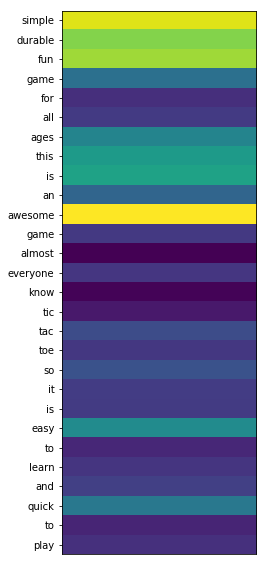

In [2]:
positive_review = ("Simple, Durable, Fun game for all ages."
                   "This is an AWESOME game!"
                   "Almost everyone know tic-tac-toe so "
                   "it is EASY to learn and quick to play.")

heatmap = generate_heatmap(positive_review)
words = text_to_word_sequence(positive_review)

image = np.ones((1, 10)) * heatmap.reshape(-1, 1)

plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.xticks([])
plt.yticks(range(len(words)), words)
plt.show()

## WordCloud

Below is wordcloud visualization where bigger words are more important for given class activation.

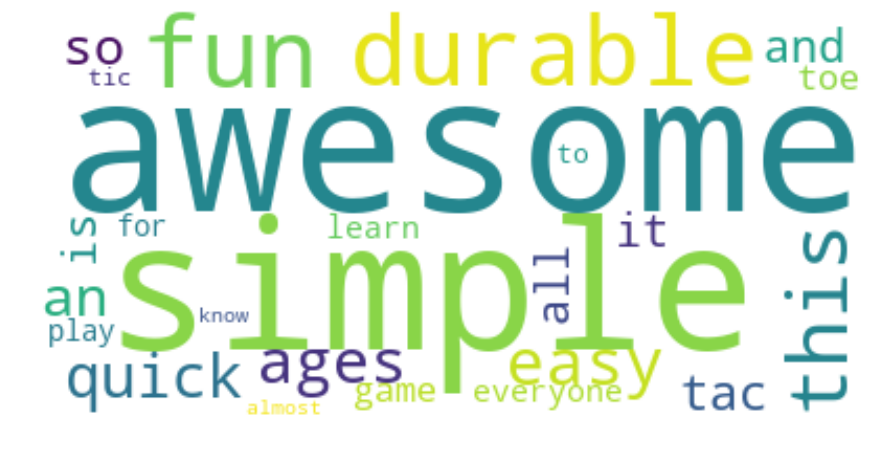

In [3]:
wordcloud = generate_wordcloud(words, heatmap)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()